In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
config = {
    'project': 'qalf',
    'domain': 'tacred',
    'relation': 'org_top_members_employees',
    'splits': [0, 1],
    'supervision': 'traditional',
#     'max_train': 500,
#     'max_lfs': 1,
#     'learn_deps': True,
#     'gen_model_search_space': 1,
#     'gen_init_params': {
#         'lf_propensity'         : True,
#         'class_prior'           : True,
#         'lf_class_propensity'   : True,
#         'seed'                  : None,
#     },
#     'gen_params_default': {
#         'step_size'     : 0.0001,
#         'decay'         : 0.90,
#         'reg_param'     : 0.50,
#         'epochs'        : 25,
#     },    
    'disc_model_class': 'logreg',    
    'disc_model_search_space': 1,
    'disc_params_default': {
        'lr'        : 1e-4,
        'n_epochs'  : 50,
        'l1_penalty': 1e-3,
        'l2_penalty': 1e-3,
    }
#     'disc_params_range': {
#         'lr'        : [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
#         'l1_penalty': [1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4],
#         'l2_penalty': [1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4],
#     },
}

In [3]:
# Get DB connection string and add to globals
# NOTE: $SNORKELDB must be set before any snorkel imports
import os

default_db_name = 'qalf_' + config['domain'] + ('_debug' if config.get('debug', False) else '')
DB_NAME = config.get('db_name', default_db_name)
if 'postgres' in config and config['postgres']:
    DB_TYPE = 'postgres'
else:
    DB_TYPE = 'sqlite'
    DB_NAME += '.db'
DB_ADDR = "localhost:{0}".format(config['db_port']) if 'db_port' in config else ""
os.environ['SNORKELDB'] = '{0}://{1}/{2}'.format(DB_TYPE, DB_ADDR, DB_NAME)
print("$SNORKELDB = {0}".format(os.environ['SNORKELDB']))

$SNORKELDB = sqlite:///qalf_tacred_org_top_members_employees.db


In [4]:
from snorkel import SnorkelSession
session = SnorkelSession()

# Resolve config conflicts (nb_config > local_config > global_config)
from snorkel.contrib.babble.pipelines import merge_configs, get_local_pipeline
config = merge_configs(config)

from snorkel.models import candidate_subclass
candidate_class = candidate_subclass(config['candidate_name'], config['candidate_entities'])

pipeline = get_local_pipeline(config['domain'], config['project'])
pipe = pipeline(session, candidate_class, config)

Overwriting l2_penalty=0 to l2_penalty=0.001
Overwriting lr=0.01 to lr=0.0001
Overwriting l1_penalty=0 to l1_penalty=0.001
Overwriting n_epochs=25 to n_epochs=50
Overwriting domain=None to domain=tacred
Overwriting batch_size=128 to batch_size=64
Overwriting n_epochs=20 to n_epochs=50
Overwriting lr=0.01 to lr=0.0001
Overwriting l2_penalty=1.0 to l2_penalty=0.001
Overwriting l1_penalty=1.0 to l1_penalty=0.001
Overwriting disc_model_search_space=10 to disc_model_search_space=1
Overwriting disc_model_class=lstm to disc_model_class=logreg
Overwriting supervision=generative to supervision=majority
Overwriting project=babble to project=qalf
Overwriting splits=[0, 1, 2] to splits=[0, 1]
Using TacredQalfPipeline object.


In [5]:
%time pipe.parse()

Split 0: 7824 Candidates
Split 1: 2039 Candidates
Split 2: 0 Candidates


In [6]:
%time pipe.extract()

Clearing existing...
Running UDF...
[========================================] 100%

Split 0: Extracted 5200 Candidates
CPU times: user 14.1 s, sys: 193 ms, total: 14.3 s
Wall time: 14.2 s


In [7]:
%time pipe.load_gold()

[========================================] 100%

AnnotatorLabels created: 5200
CPU times: user 1min 2s, sys: 241 ms, total: 1min 2s
Wall time: 1min 2s


In [8]:
# %time pipe.featurize()

In [9]:
# %time pipe.collect()

In [10]:
# %time pipe.label()

In [11]:
from snorkel.annotations import load_gold_labels
# L_gold_train = load_gold_labels(session, annotator_name='gold', split=0)
# L_gold_train
# pipe.L_train.lf_stats(session, labels=L_gold_train)

In [13]:
# from snorkel.annotations import load_gold_labels
# L_gold_dev   = load_gold_labels(session, annotator_name='gold', split=1)
# L_gold_dev
# pipe.L_dev.lf_stats(session, labels=L_gold_dev)

In [14]:
# %time pipe.supervise()

In 'traditional' supervision mode...grabbing candidate and gold label subsets.
NOTE: traditional supervision helper assumes all candidates have labels.
No value found for max_train. Using all available gold labels.
Using 7824 traditional gold labels
(7824,)


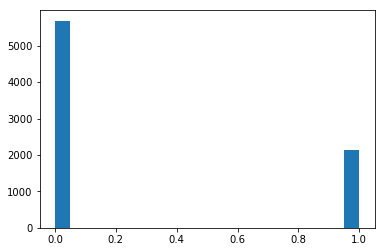

In [15]:
# pipe.L_dev.lf_stats(session, labels=L_gold_dev)
# L_test.lf_stats(session, labels=L_gold_test)

In [15]:
# %time pipe.supervise()

In [16]:
# %time pipe.classify()